# Section 2: Sentiment Analysis on SnappFood dataset

## Sentiment Analysis without using Neural Networks

In [ ]:
!pip install parsivar

     |████████████████████████████████| 36.2 MB 56 kB/s 
     |████████████████████████████████| 1.5 MB 57.8 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492971 sha256=6f99c9ef7173fe2a3d7e468c258554c085133787228a8d6fd2a9c65739053591
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449927 sha256=9cb4307e1c2abf4a3e8ba69ce659ec1293a716f80a3c7622a6b78d9ab233bda9
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
# Loading NLTk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# NLP libraries
import parsivar
from parsivar import Normalizer, Tokenizer, FindStems, POSTagger, FindChunks

# plot
import matplotlib.pyplot as plt

import pandas as pd
import string
import re
import numpy as np
np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

### Read dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's read SnappFood dataset.
If we open these files with notepad, we see that the columns seprated by tab, so, we should specify seprator in read_csv function.

In [ ]:
# read csv dataset
train = pd.read_csv('/content/drive/MyDrive/AI-Internship/snappfood/snappfood/train.csv', sep='\t')
valid = pd.read_csv('/content/drive/MyDrive/AI-Internship/snappfood/snappfood/dev.csv', sep='\t')
test = pd.read_csv('/content/drive/MyDrive/AI-Internship/snappfood/snappfood/test.csv', sep='\t')

# pritn shape of each dataset
print(f'train_data shape : {train.shape}')
print(f'valid_data shape : {valid.shape}')
print(f'test_data shape : {test.shape}')

train_data shape : (56700, 4)
valid_data shape : (6300, 4)
test_data shape : (7000, 4)


In [ ]:
train.head()

,Unnamed: 0,comment,label,label_id
0,0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


In [ ]:
valid.head()

,Unnamed: 0,comment,label,label_id
0,0,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...,SAD,1
1,1,تشکر، عالی‌تر از همیشه,HAPPY,0
2,2,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...,HAPPY,0
3,3,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد؟؟؟,SAD,1
4,4,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...,SAD,1


In [ ]:
test.head()

,Unnamed: 0,comment,label,label_id
0,0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0
1,1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0
2,2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1
3,3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1
4,4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1


### Data Cleaning

#### Remove irrelevant columns

Now we should remove irrelevant columns in each dataset.

In [ ]:
train_data = train.copy()
valid_data = valid.copy()
test_data = test.copy()

train_data.drop(labels=['Unnamed: 0','label'], axis=1, inplace=True) # remove useless columns
valid_data.drop(labels=['Unnamed: 0','label'], axis=1, inplace=True) # remove useless columns
test_data.drop(labels=['Unnamed: 0','label'], axis=1, inplace=True) # remove useless columns

In [ ]:
print(f'train_data shape : {train_data.shape}')
print(f'valid_data shape : {valid_data.shape}')
print(f'test_data shape : {test_data.shape}')

train_data shape : (56700, 2)
valid_data shape : (6300, 2)
test_data shape : (7000, 2)


In [ ]:
train_data.head()

,comment,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,0
4,شیرینی وانیلی فقط یک مدل بود.,0


#### Change header name

In [ ]:
#change header name
train_data.columns = ['comment','label']
valid_data.columns = ['comment','label']
test_data.columns = ['comment','label']

In [ ]:
train_data.head()

,comment,label
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,0
4,شیرینی وانیلی فقط یک مدل بود.,0


Because we want to use the polarity of each word, we should change the label from 1 to -1 (for negative comments) and change the label from 0 to 1 (for positive comments).

In [ ]:
# 0 means HAPPY and 1 means SAD
train_data.label[train_data.label == 1] = -1
train_data.label[train_data.label == 0] = 1

valid_data.label[valid_data.label == 1] = -1
valid_data.label[valid_data.label == 0] = 1

test_data.label[test_data.label == 1] = -1
test_data.label[test_data.label == 0] = 1

In [ ]:
train_data.head()

,comment,label
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,-1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,1
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,-1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,1
4,شیرینی وانیلی فقط یک مدل بود.,1


###EDA

Description of each columns:


*   comment : people's opinion about food and restaurant
*   label : 1 means positive comment and -1 means negative comment





In the beginning, we should check the existence of null data to treat them.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56700 entries, 0 to 56699
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  56700 non-null  object
 1   label    56700 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 886.1+ KB


In [ ]:
train_data.isnull().sum()

comment    0
label      0
dtype: int64

In [ ]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  6300 non-null   object
 1   label    6300 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 98.6+ KB


In [ ]:
valid_data.isnull().sum()

comment    0
label      0
dtype: int64

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  7000 non-null   object
 1   label    7000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 109.5+ KB


In [ ]:
test_data.isnull().sum()

comment    0
label      0
dtype: int64

As wee saw, we don't have null data in train, valid and test data.

Let's see distribution of train, valid and test dataset.

In [ ]:
train_data.label.value_counts()

-1    28350
 1    28350
Name: label, dtype: int64

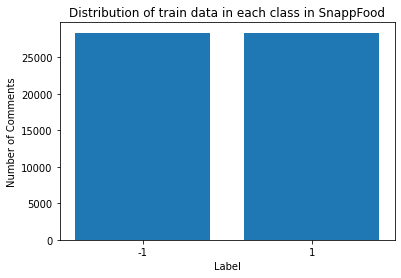

In [ ]:
# distribution of data in each class
distribution = list(train_data.label.value_counts())

import matplotlib.pyplot as plt
plt.bar(['-1', '1'] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Comments")
plt.title("Distribution of train data in each class in SnappFood")
plt.show()

Let's print one example of each class.


In [ ]:
# sample happy comment
train_data[train_data['label']==1].sample(n=1)['comment'].iloc[0]

'خوب بود ولی اگر شیرینی کمتری داشته باشد بهتر می\u200cباشد.'

If in text preprocessing fuction, we replace half-space with ' ' we have better representation of sentence.

In [ ]:
review = 'خوب بود ولی اگر شیرینی کمتری داشته باشد بهتر می‌باشد.'
review =  re.sub('\u200c', ' ',review)
review

'خوب بود ولی اگر شیرینی کمتری داشته باشد بهتر می باشد.'

\u200c represents half-space between 'می' and 'باشد'.

In [ ]:
# sample sad comment
train_data[train_data['label']==-1].sample(n=1)['comment'].iloc[0]

'پیتزا اصلا با کیفیت نبود.'

In [ ]:
valid_data.label.value_counts()

-1    3150
 1    3150
Name: label, dtype: int64

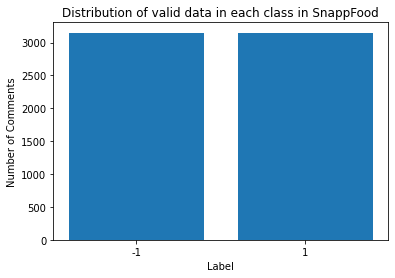

In [ ]:
# distribution of data in each class
distribution = list(valid_data.label.value_counts())

import matplotlib.pyplot as plt
plt.bar(['-1', '1'] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Comments")
plt.title("Distribution of valid data in each class in SnappFood")
plt.show()

In [ ]:
test_data.label.value_counts()

-1    3500
 1    3500
Name: label, dtype: int64

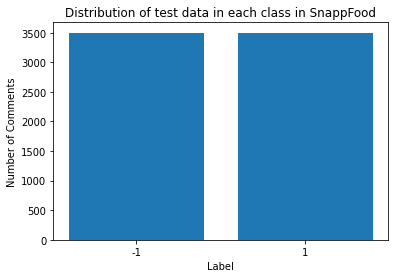

In [ ]:
# distribution of data in each class
distribution = list(test_data.label.value_counts())

import matplotlib.pyplot as plt
plt.bar(['-1', '1'] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Comments")
plt.title("Distribution of test data in each class in SnappFood")
plt.show()

As we saw, we have balaced data.

### Text preprocessing


#### Stop Words


In [ ]:
# define a function to read file
def readFile(filename):
  fileObj = open(filename, 'r') # open the file in read mode
  words = fileObj.read().splitlines() # puts the file into an array
  fileObj.close()
  return words

In [ ]:
stopwords = readFile('/content/drive/MyDrive/AI-Internship/persian_stopwords_kharazi.txt')
print(f'length of stop words : {len(stopwords)}')

length of stop words : 1370


In [ ]:
print(f'some of stop words : {stopwords[:30]}')

some of stop words : ['!', '"', '#', '(', ')', '*', ',', '-', '.', '/', ':', '[', ']', '«', '»', '،', '؛', '؟', 'آباد', 'آخ', 'آخر', 'آخرها', 'آخه', 'آدمهاست', 'آرام', 'آرام آرام', 'آره', 'آری', 'آزادانه', 'آسان']


#### Preprocessing function

Because, after stemming we have '&' in between of our verbs, we should delete them in function delete_and.

In [ ]:
def delete_and(word):
  idx = word.find("&")
  if idx!=-1:
    word = word[:idx]
  return word

In [ ]:
def data_preprocessing(review, stopwords):
  try:
    # replace half-space with ' '
    review =  re.sub('\u200c', ' ',review)

    # Normalizing the text
    # First we should normalize text in order to convert persian numbers into english numbers then
    # with following function (filter) delete them
    # Because, some comments are pinglish, we should set pinglish_conversion_needed = True
    normalizer = Normalizer(pinglish_conversion_needed=True) 
    review = normalizer.normalize(review)

    # because after normalization appear some '/u200c', we should replace them with space
    review =  re.sub('\u200c', ' ',review)

    # delete english characters and numbers from sentences
    review = filter(lambda x: x in string.whitespace or x not in string.printable, review)
    review = ''.join(ch for ch in list(review))
    
    if review != ' ':
      # word tokenization
      tokenizer = Tokenizer()
      words = tokenizer.tokenize_words(review)

      # stemming 
      stemmer = FindStems()
      review = [stemmer.convert_to_stem(word) for word in words]

      # we should delete '&', because after stemming we have '&' in between of our verbs
      review = [delete_and(word) for word in review]

      # remove stop words
      words_without_stopword = filter(lambda x: x not in stopwords, review)
      words_without_stopwords = list(words_without_stopword)
    
      # join words in preprocessed review
      review = ' '.join(words_without_stopwords)
    
    return review

  except TypeError:
    print(review)
    raise

##### Perform process on a sentence

Let's perform this process on a sentence for example.

In [ ]:
review = 'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم بود.'
review =  re.sub('\u200c', ' ',review)
review

'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم بود.'

In [ ]:
normalizer = Normalizer(pinglish_conversion_needed=True) 
review = normalizer.normalize(review)
review

'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم\u200cبود .'

In [ ]:
review =  re.sub('\u200c', ' ',review)
review

'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم بود .'

In [ ]:
review = filter(lambda x: x in string.whitespace or x not in string.printable, review)
review = ''.join(ch for ch in list(review))
review

'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم بود '

In [ ]:
tokenizer = Tokenizer()
words = tokenizer.tokenize_words(review)
words

['غذا',
 'به',
 'سرعت',
 'تحویل',
 'داده',
 'شد',
 'ولی',
 'حجم',
 'ساندویچ',
 'کم',
 'بود']

In [ ]:
stemmer = FindStems()
review = [stemmer.convert_to_stem(word) for word in words]
review

['غذا',
 'به',
 'سرعت',
 'تحویل',
 'داده',
 'شد',
 'ولی',
 'حجم',
 'ساندویچ',
 'کم',
 'بود&باش']

In [ ]:
review = [delete_and(word) for word in review]

In [ ]:
review

['غذا',
 'به',
 'سرعت',
 'تحویل',
 'داده',
 'شد',
 'ولی',
 'حجم',
 'ساندویچ',
 'کم',
 'بود']

In [ ]:
words_without_stopword = filter(lambda x: x not in stopwords, review)
words_without_stopwords = list(words_without_stopword)
words_without_stopwords

['غذا', 'سرعت', 'تحویل', 'حجم', 'ساندویچ']

In [ ]:
review = ' '.join(words_without_stopwords)
review

'غذا سرعت تحویل حجم ساندویچ'

##### Apply function on the dataset

Let's use pandarallel to speed up our process on a column of dataset.

In [ ]:
! pip install pandarallel

In [ ]:
from pandarallel import pandarallel

In [ ]:
# initialize pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Let's apply this function on our dataset. This work, took 39 minutes for me.

In [ ]:
train_data['preprocessing_text'] = train_data['comment'].parallel_apply(lambda text: data_preprocessing(text, stopwords))
valid_data['preprocessing_text'] = valid_data['comment'].parallel_apply(lambda text: data_preprocessing(text, stopwords))
test_data['preprocessing_text'] = test_data['comment'].parallel_apply(lambda text: data_preprocessing(text, stopwords))


In [ ]:
# #Save dataframe
# !mkdir -p /content/drive/MyDrive/AI-Internship/SnappFood_preprocessed
# train_data.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/train_data')
# valid_data.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/valid_data')
# test_data.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/test_data')

In [ ]:
#load the preprocessing dataframe
train_data= pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/train_data')
valid_data= pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/train_data')
test_data= pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/train_data')


In [ ]:
train_data.head()

,comment,label,preprocessing_text
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,-1,حیف وقت نوشت سرویس دهیتون افتضاح
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,1,قرار ساعته برسه نیم ساعت موقع دید چقدررررررررر...
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,-1,قیمت مدل کیفیت سازگاری نداره ظاهر فریبنده پرش ...
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,1,عالللی اندازه کیفیت امیداورم کیفیتتون باشه مشت...
4,شیرینی وانیلی فقط یک مدل بود.,1,شیرینی نیل مدل


In [ ]:
valid_data.head()

,comment,label,preprocessing_text
0,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...,-1,ساندویچ سرد صورتی فاصله رستوران دقیقه اس
1,تشکر، عالی‌تر از همیشه,1,تشکر عالی
2,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...,1,مرغ کدو دوس ساندویچ خوشمزه
3,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد؟؟؟,-1,نمیدونم هزینه بسته بند دلیل ؟؟؟
4,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...,-1,نوشابه ارسال تاخیر فراوان غذا سرد


In [ ]:
test_data.head()

,comment,label,preprocessing_text
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,1,خواهشا خواهشا خواهشا سه ارسال شیرینی فکری شانس...
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,1,غذا گرم کیفیت پخت گوشت عالی
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,-1,قیمت سس شکلات بسته بند قیمت اعلامی اسنپ تومن ت...
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,-1,عکس پیج شیرینی شکری روشن رنگ هممون قاعدتا تست ...
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,-1,میگ پیتزا اینقد چرب باشه


Let's print some of examples from train dataset.

In [ ]:
# this example is in pinglish 
print(f'row 13 of train_data (before preprocessing) : {train_data.comment[13]}')
print(f'row 13 of train_data (after preprocessing) : {train_data.preprocessing_text[13]}')

row 13 of train_data (before preprocessing) : Kheili khub bud mersi vaghan
row 13 of train_data (after preprocessing) : 


In [ ]:
# this example is in eglish and persian
print(f'row 68 of train_data (before preprocessing) : {train_data.comment[68]}')
print(f'row 68 of train_data (after preprocessing) : {train_data.preprocessing_text[68]}')

row 68 of train_data (before preprocessing) : The nutella and caramel rolls are AMAZING!!! GREAT service and very delicious desserts- عالى!!!!
row 68 of train_data (after preprocessing) : اره ور عالی


In [ ]:
# this example is in pinglish 
print(f'row 1347 of train_data (before preprocessing) : {train_data.comment[1347]}')
print(f'row 1347 of train_data (after preprocessing) : {train_data.preprocessing_text[1347]}')

row 1347 of train_data (before preprocessing) : Eclair behtarin o khoshmaze tarin shirinihae tehrano dare kolan
row 1347 of train_data (after preprocessing) : خوشمزه کلان


In [ ]:
# this example is in pinglish 
print(f'row 2659 of train_data (before preprocessing) : {train_data.comment[2659]}')
print(f'row 2659 of train_data (after preprocessing) : {train_data.preprocessing_text[2659]}')

row 2659 of train_data (before preprocessing) : Margarita pizza is the simplest pizza and a great test for a pizza place- The Italians don’t bake the pizza with basil for a reason
row 2659 of train_data (after preprocessing) : تست


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56700 entries, 0 to 56699
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comment             56700 non-null  object
 1   label               56700 non-null  int64 
 2   preprocessing_text  56700 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


As we see in train_data.info(), we don't have null data. But in above cells, we saw that some preprocessing_text are empty because of preprocessing function(i.e. they are english comments are they consist of just stop words). So, I think it's better to find these rows and remove them from dataset. Let's define a function for this work.

**It's better not to remove these rows from test data, because in real world we don't have access to test data.**


In [ ]:
def find_empty_rows(df):
  row_num = []
  for i in range(df.shape[0]):
    if df.preprocessing_text[i] == "" or df.preprocessing_text[i] == " ":
      row_num.append(i)
  return row_num    


In [ ]:
train_idx = find_empty_rows(train_data)
valid_idx = find_empty_rows(valid_data)
test_idx = find_empty_rows(test_data)

print(f'there are {len(train_idx)} rows of train preprocessing_text empty.')
print(f'there are {len(valid_idx)} rows of valid preprocessing_text empty.')
print(f'there are {len(test_idx)} rows of test preprocessing_text empty.')

there are 205 rows of train preprocessing_text empty.
there are 14 rows of valid preprocessing_text empty.
there are 21 rows of test preprocessing_text empty.


In [ ]:
print(train_idx)

[13, 153, 157, 491, 677, 797, 908, 1456, 1512, 1955, 2171, 2214, 2254, 2279, 2508, 2827, 2909, 2950, 4057, 4429, 4567, 4933, 4994, 5463, 5925, 6263, 6384, 6498, 6839, 7373, 7683, 8633, 8709, 8960, 9604, 9682, 9940, 10279, 10292, 10576, 10798, 11602, 11903, 12212, 12702, 12856, 13154, 13513, 13568, 13787, 13873, 13920, 14234, 14258, 14517, 14598, 14751, 14832, 15153, 15333, 15386, 16212, 16468, 17004, 17074, 17098, 17192, 17405, 17824, 18069, 18083, 18699, 18767, 19176, 19517, 19943, 20046, 20666, 21328, 21364, 21392, 21662, 21900, 21923, 22213, 22233, 22896, 22958, 23110, 24111, 24292, 24519, 25029, 25249, 25318, 25605, 25644, 25678, 25822, 26703, 26759, 26921, 27213, 27227, 27295, 27355, 27412, 28269, 28356, 28417, 28462, 29106, 29274, 29291, 29993, 30189, 30329, 30522, 30916, 31680, 31801, 32008, 32092, 32353, 32451, 32667, 32887, 32928, 32930, 32983, 33206, 33869, 33963, 34060, 35921, 36081, 36758, 37215, 38117, 38212, 38216, 38313, 38540, 38815, 39293, 39882, 39910, 40321, 40561, 4

Let's take a look at one of these rows. This row consists of stop words. So, after applying preprocessing function, our preprocessed_text will be empty.

In [ ]:
# this example is in pinglish 
print(f'row 56089 of train_data (before preprocessing) : {train_data.comment[56089]}')
print(f'row 56089 of train_data (after preprocessing) : {train_data.preprocessing_text[56089]}')

row 56089 of train_data (before preprocessing) : قبلا خیلی بهتر بود
row 56089 of train_data (after preprocessing) : 


Let's delete rows with empty preprocessing text. (I delete empty rows from valid and test datasets but, in the real world we should not do this work.)

In [ ]:
train_data = train_data.drop(labels=train_idx, axis=0)
valid_data = valid_data.drop(labels=valid_idx, axis=0)
test_data = test_data.drop(labels=test_idx, axis=0)

In [ ]:
train_data.head()

,comment,label,preprocessing_text
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,-1,حیف وقت نوشت سرویس دهیتون افتضاح
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,1,قرار ساعته برسه نیم ساعت موقع دید چقدررررررررر...
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,-1,قیمت مدل کیفیت سازگاری نداره ظاهر فریبنده پرش ...
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,1,عالللی اندازه کیفیت امیداورم کیفیتتون باشه مشت...
4,شیرینی وانیلی فقط یک مدل بود.,1,شیرینی نیل مدل


In [ ]:
train_data.shape

(56495, 3)

In [ ]:
# Save dataset
# !mkdir -p /content/drive/MyDrive/AI-Internship/SnappFood_preprocesed_remove_empty
# train_data.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_preprocesed_remove_empty/train_data')
# valid_data.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_preprocesed_remove_empty/valid_data')
# test_data.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_preprocesed_remove_empty/test_data')

In [ ]:
#load the preprocessing dataframe
train_data= pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_preprocesed_remove_empty/train_data')
valid_data= pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_preprocesed_remove_empty/valid_data')
test_data= pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_preprocesed_remove_empty/test_data')


In [ ]:
train_data.shape

(56495, 3)

### Word Cloud

In [ ]:
!pip install wordcloud-fa

     |████████████████████████████████| 76 kB 2.5 MB/s 
     |████████████████████████████████| 364 kB 27.0 MB/s 
     |████████████████████████████████| 316 kB 44.6 MB/s 
     |████████████████████████████████| 233 kB 51.7 MB/s 
     |████████████████████████████████| 1.4 MB 36.8 MB/s 
  Created wheel for wordcloud-fa: filename=wordcloud_fa-0.1.8-py3-none-any.whl size=71015 sha256=11dea25508164a8e383686fe3181960b6dc8c92d305f215be6a6db79646d0748
  Stored in directory: /root/.cache/pip/wheels/ae/a0/f3/81d930500493324929d26658e5a3ccff5ccc8644131ad1aadc
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=956b5cac5a0ecc9a62729027d48b6146ac78b85f361df41730621666c280532b
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154256 sha256=07c58c3fcf07d6062b13cc1c26bbc49ef59fac768aeae24013ed2947791b7e51
  Stored in directory:

In [ ]:
# for supporting persian language
from wordcloud_fa import WordCloudFa 

#### SAD words frequency

In [ ]:
df_sad = train_data.loc[train_data['label'] == -1]

text_sad = " ".join(text for text in df_sad['preprocessing_text'])

In [ ]:
print ("There are {} words in the combination of all SAD texts.".format(len(text_sad)))

There are 1517239 words in the combination of all SAD texts.


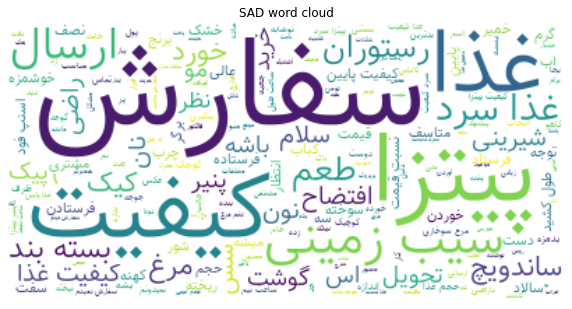

In [ ]:
# Generate a word cloud image for SAD
wordcloud_sad = WordCloudFa(background_color="white").generate(text_sad)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,12))
plt.imshow(wordcloud_sad, interpolation='bilinear')
plt.axis("off")
plt.title('SAD word cloud')
plt.show()

#### HAPPY words frequency

In [ ]:
df_happy = train_data.loc[train_data['label'] == 1]

text_happy = " ".join(text for text in df_happy['preprocessing_text'])

In [ ]:
print ("There are {} words in the combination of all HAPPY texts.".format(len(text_happy)))

There are 1148067 words in the combination of all HAPPY texts.


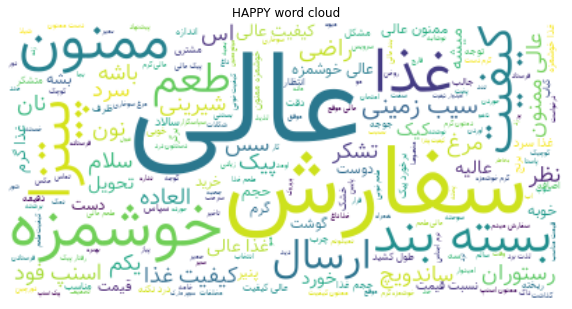

In [ ]:
# Generate a word cloud image for SAD
wordcloud_happy = WordCloudFa(background_color="white").generate(text_happy)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,12))
plt.imshow(wordcloud_happy, interpolation='bilinear')
plt.axis("off")
plt.title('HAPPY word cloud')
plt.show()

### Remove 'comment' columns

In [ ]:
snapp_train = train_data.copy()
snapp_train.drop(labels=['comment'], axis=1, inplace=True) # remove comment column

snapp_valid = valid_data.copy()
snapp_valid.drop(labels=['comment'], axis=1, inplace=True) # remove comment column

snapp_test = test_data.copy()
snapp_test.drop(labels=['comment'], axis=1, inplace=True) # remove comment column


In [ ]:
print(f'snapp_train shape : {snapp_train.shape}')
print(f'snapp_valid shape : {snapp_valid.shape}')
print(f'snapp_test shape : {snapp_test.shape}')

snapp_train shape : (56495, 2)
snapp_valid shape : (6286, 2)
snapp_test shape : (6979, 2)


### BaseLine model

#### Read PerSent dataset

In this section we want to construct baseline model, based on palarity of each word in text. Let's read the PerSent.xlsx file that contains the word and polarity of each word.

In [ ]:
from pandas import read_excel

my_sheet = 'Dataset' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = r'/content/drive/MyDrive/AI-Internship/PerSent.xlsx' 
persent = read_excel(file_name, sheet_name = my_sheet)

In [ ]:
persent.head()

,Words,POS,Polarity
0,خوب,Adj,0.70
1,بد,Adj,-0.69
2,درست,Adj,0.00
3,غلط,Adj,-0.50
4,زیبا,Adj,0.00


In [ ]:
persent.shape

(1490, 3)

#### Construct baseline model

Let's construct a baseline model based on sum of words polarity.

In [ ]:
y_pred_test = []
y_actual_test = []

def BaseLine(text_data):


  for text, label in zip(test_data['preprocessing_text'], test_data['label']):  

    tokenizer = Tokenizer()
    words = tokenizer.tokenize_words(text)
    
    sentiment = 0

    for word in words:
      if word in persent.Words.values:
        
        # calculate sentiment of sentence by summing polarity of each word in sentence
        sentiment += persent._get_value(persent.index[persent.Words == word][0], 'Polarity')
    
    y_pred_test.append(1 if sentiment>=0 else -1)     
    y_actual_test.append(label)

  return y_pred_test, y_actual_test

In [ ]:
snapp_test.head()

,label,preprocessing_text
0,1,خواهشا خواهشا خواهشا سه ارسال شیرینی فکری شانس...
1,1,غذا گرم کیفیت پخت گوشت عالی
2,-1,قیمت سس شکلات بسته بند قیمت اعلامی اسنپ تومن ت...
3,-1,عکس پیج شیرینی شکری روشن رنگ هممون قاعدتا تست ...
4,-1,میگ پیتزا اینقد چرب باشه


In [ ]:
snapp_test.shape

(6979, 2)

In [ ]:
snapp_test.label.value_counts()

-1    3496
 1    3483
Name: label, dtype: int64

In [ ]:
# test baseline on test data

y_pred_test, y_actual_test = BaseLine(snapp_test)

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report
import seaborn as sns

def confusion_matrix(y_actual_test, y_pred_test):
  
  plt.figure(figsize = (6,5))
  ax= plt.subplot()
  cnf_matrix = metrics.confusion_matrix(y_actual_test, y_pred_test)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
  ax.set_title('Confusion Matrix of model'); 
  class_names= [-1, 1]
  ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
  plt.tight_layout()

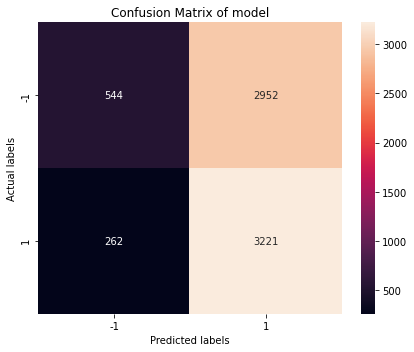

In [ ]:
confusion_matrix(y_actual_test, y_pred_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_actual_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.67      0.16      0.25      3496
           1       0.52      0.92      0.67      3483

    accuracy                           0.54      6979
   macro avg       0.60      0.54      0.46      6979
weighted avg       0.60      0.54      0.46      6979



Let's construct another baseline model, based on comparison number of words with positive and negative polarity.

In [ ]:
y_pred_test = []
y_actual_test = []

def BaseLine2(text_data):


  for text, label in zip(test_data['preprocessing_text'], test_data['label']):  

    tokenizer = Tokenizer()
    words = tokenizer.tokenize_words(text)
    
    negative = []
    positive = []

    for word in words:
      if word in persent.Words.values:

        if persent._get_value(persent.index[persent.Words == word][0], 'Polarity') >=0:
          positive.append(1)
        else:
          negative.append(-1)          

    
    y_pred_test.append(1 if len(positive)>=len(negative) else -1)     
    y_actual_test.append(label)

  return y_pred_test, y_actual_test

In [ ]:
# test baseline on test data

y_pred_test, y_actual_test = BaseLine2(snapp_test)

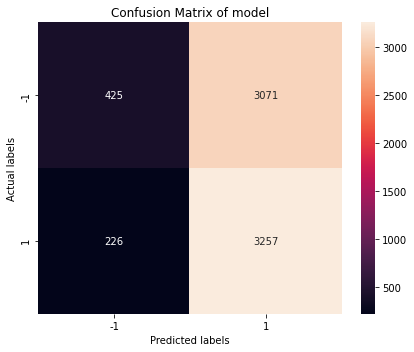

In [ ]:
confusion_matrix(y_actual_test, y_pred_test)

In [ ]:
print(classification_report(y_actual_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.65      0.12      0.20      3496
           1       0.51      0.94      0.66      3483

    accuracy                           0.53      6979
   macro avg       0.58      0.53      0.43      6979
weighted avg       0.58      0.53      0.43      6979



As we see, model 1 outperforms model 2 a little bit.

## Sentiment Analysis using LSTM

### Prepare Dataset for Neural Network

#### Clean dataset

In the beginning, I changed the label to make it more understandable, but since, we have binary classification and we should work with the sigmoid function, I change them to default. (0-> happy and 1-> sad)

In [ ]:
# 0 means HAPPY and 1 means SAD
snapp_train.label[snapp_train.label == 1] = 0
snapp_train.label[snapp_train.label == -1] = 1

snapp_valid.label[snapp_valid.label == 1] = 0
snapp_valid.label[snapp_valid.label == -1] = 1

snapp_test.label[snapp_test.label == 1] = 0
snapp_test.label[snapp_test.label == -1] = 1

In [ ]:
# # Save dataset
# !mkdir -p /content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit
# snapp_train.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/snapp_train')
# snapp_valid.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/snapp_valid')
# snapp_test.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/snapp_test')

Let's save these dataset in CSV form to use them in TabularDataset.

In [ ]:
# snapp_train.to_csv('/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/train.csv', index=False)
# snapp_valid.to_csv('/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/valid.csv', index=False)
# snapp_test.to_csv('/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/test.csv', index=False)

In [ ]:
#load the preprocessing dataframe
snapp_train = pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/snapp_train')
snapp_valid = pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/snapp_valid')
snapp_test = pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/snapp_test')


Let's take a look at length of texts in dataset.

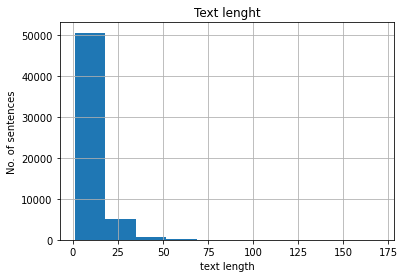

count    56495.000000
mean         8.778494
std          7.490531
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max        170.000000
dtype: float64

In [ ]:
text_len = [len(i.split()) for i in snapp_train.preprocessing_text.values]
pd.Series(text_len).hist()
plt.title('Text lenght')
plt.xlabel('text length')
plt.ylabel('No. of sentences')
plt.show()
pd.Series(text_len).describe()

Let's print one sentences with its words.

In [ ]:
[(i.split()) for i in snapp_train.preprocessing_text.values[:1]]

[['حیف', 'وقت', 'نوشت', 'سرویس', 'دهیتون', 'افتضاح']]

As we see in the above histogram, we have sentences with lengths one. In the following cell, we want to see how many sentences we have with lengths equals to one.

In [ ]:
len_one = []
for i in snapp_train.preprocessing_text.values:
  if len(i.split())==1: 
    len_one.append(i)

print(len_one)
print(f'we have {len(len_one)} texts with lenghts = 1')

['خوشمزه', 'غذا', 'عالی', 'عالی', 'غذا', 'اسنپ', 'یبار', 'سرد', 'عالی', 'عالی', 'مرسییییی', 'کیفیت', 'اندازه', 'متشکر', 'نظیره', 'کیفیت', 'لوبیپلو', 'سفارش', 'غذا', 'ارسال', 'خوشمزه', 'کیفیت', 'متشکر', 'ممنون', 'فاکتور', 'شور', 'شکلات', 'غذا', 'عالی', 'سپاسگزار', 'ومتنوع', 'بدتر', 'همهچیش', 'ترد', 'عالی', 'ممنون', 'تواضع', 'تاخیر', 'عالی', 'عالی', 'عالیییی', 'عالی', 'نون', 'تند', 'موقع', 'عالی', 'نهایت', 'کیلو', 'راضی', 'تشکر', 'ضعیف', 'عالی', 'راضی', 'عالی', 'شل', 'موقع', 'عالی', 'موقع', 'غذا', 'شیرینی', 'چیزکیک', 'طعم', 'طعم', 'عالی', 'تست', 'موقع', 'دست', 'نون', 'عالی', 'ممنون', 'داغ', 'پول', 'داغ', 'عالی', 'کیفیت', 'سرد', 'منظم', 'توصیه', 'بادقت', 'وبموقع', 'خوشمزه', 'غذا', 'کیفیت', 'قیمت', 'قیمت', 'اومد', 'قربان', 'قناد', 'قارچ', 'راضی', 'مرغ', 'عالی', 'متشکر', 'دلپذیر', 'سرد', 'دوظرف', 'ممنون', 'شیرینی', 'عالی', 'لذیذ', 'تایم', 'حجمشو', 'تحویل', 'کیفیت', 'غذا', 'فرستاده', 'خوشمزه', 'عاااالیه', 'قیمت', 'تاخیر', 'تحویل', 'دیگس', 'تشکر', 'موقع', 'درد', 'مگه', 'خوشمزه', 'طعم', 'عاااا

#### Load the custom dataset using PyTorchText TabularDataset

In [ ]:
import torch
import torchtext
from torchtext.legacy import data
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.optim import lr_scheduler
from torch.utils.data.dataset import random_split

from sklearn.model_selection import train_test_split
from torchtext.vocab import Vectors
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#Reproducing same results
SEED = 2019
torch.manual_seed(SEED)

In [ ]:
# define pipline for text and label columns
TEXT = data.Field(tokenize='spacy',
                  include_lengths=True, batch_first=True)
LABEL = data.LabelField(dtype = torch.float,batch_first=True)

Let's define our column name and preprocessing pipline for that column, with tupless in fileds.

In [ ]:
fields = [('label', LABEL), ('preprocessing_text',TEXT)]

In [ ]:
train_data = data.TabularDataset(path='/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/train.csv'
                                , format='csv', fields=fields, skip_header=True)

valid_data = data.TabularDataset(path='/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/valid.csv'
                                , format='csv', fields=fields, skip_header=True)

test_data = data.TabularDataset(path='/content/drive/MyDrive/AI-Internship/SnappFood_FinalEdit/test.csv'
                                , format='csv', fields=fields, skip_header=True)


In [ ]:
type(train_data)

torchtext.legacy.data.dataset.TabularDataset

In [ ]:
len(train_data)

56495

In [ ]:
[(elem.label) for elem in train_data][:2]

['1', '0']

#### Construct Vocabulary

Now, we should construct vocabulary from our text and convert them into integer sequences. The vocabulary contains unique words and assigns an index for each word.

In [ ]:
TEXT.build_vocab(train_data, valid_data,min_freq=3 )
LABEL.build_vocab(train_data, valid_data)

In [ ]:
#No. of unique tokens in text
print("Size of TEXT vocabulary:",len(TEXT.vocab))
print("Size of TEXT vocabulary:",len(LABEL.vocab))
print(" ")
print('-'*200)

#Commonly used words
print(f'10 commonly used words : {TEXT.vocab.freqs.most_common(10)}')  
print(" ")
print('-'*200)

#Word dictionary
print(f'word dictionary : {TEXT.vocab.stoi}') 

Size of TEXT vocabulary: 6839
Size of TEXT vocabulary: 2
 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
10 commonly used words : [('غذا', 16683), ('کیفیت', 13919), ('عالی', 11461), ('سفارش', 11291), ('پیتزا', 8998), ('ممنون', 6085), ('سرد', 6085), ('خوشمزه', 5628), ('طعم', 5254), ('ارسال', 5158)]
 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
word dictionary : defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f60c89768d0>>, {'<unk>': 0, '<pad>': 1, 'غذا': 2, 'کیفیت': 3, 'عالی': 4, 'سفارش': 5, 'پیتزا': 6, 'سرد': 7, 'ممنون': 8, 'خوشمزه': 9, 'طعم': 10, 'ارسال': 11, 'مرغ': 12, 'پیک': 13, 'قیمت': 14, 'مزه': 15, 'سیب': 16, 'سس': 17, 'تحویل

________________

In [ ]:
TEXT.vocab.stoi['خوشحال']

920

Let's define a function to save TEXT.vocab. Because, we will need the vocabulary generated by torchtext to get the index of the words in the sentence we want to predict when we deploying model.

In [ ]:
def save_vocab(vocab, path):
    with open(path, 'w+', encoding='utf-8') as f:     
        for token, index in vocab.stoi.items():
            f.write(f'{index}\t{token}\n')


In [ ]:
# !mkdir -p /content/drive/MyDrive/AI-Internship/SnappFood_Vocabulary
save_vocab(TEXT.vocab, '/content/drive/MyDrive/AI-Internship/SnappFood_Vocabulary/SnappFood_Vocabulary.txt')

____________

Now, we will prepare batches for training the model. We use BucketIterator for this work.

In this problem, we use BucketIterator, because we want to use LSTM (a kind of recurrent neural network), and it accepts inputs with fixed size (because our texts are in different sizes, we should use padding for this work). So using BucketIterator helps us to have little processing for padding.

In [ ]:
train_batch_size = 64
valid_batch_size = 128
test_batch_size = 128

In [ ]:
# create dataloader
train_loader = data.BucketIterator(train_data, train_batch_size, sort_key= lambda x: len(x.preprocessing_text),
                                  train=True, shuffle=True, sort_within_batch=True)

valid_loader = data.BucketIterator(valid_data, valid_batch_size, sort_key= lambda x: len(x.preprocessing_text),
                                  train=False, shuffle=False, sort_within_batch=True)

test_loader = data.BucketIterator(test_data, test_batch_size, sort_key= lambda x: len(x.preprocessing_text),
                                  train=False, shuffle=False, sort_within_batch=True)


In [ ]:
print(f'length of train_dataset is : {len(train_data)} and length of train_loader is : {len(train_loader)}')
print(f'length of valid_dataset is : {len(valid_data)} and length of valid_loader is : {len(valid_loader)}')
print(f'length of test_dataset is : {len(test_data)} and length of test_loader is : {len(test_loader)}')

length of train_dataset is : 56495 and length of train_loader is : 883
length of valid_dataset is : 6286 and length of valid_loader is : 50
length of test_dataset is : 6979 and length of test_loader is : 55


Let's look at frist batch of train_loader. As we see, BucketIterator takes texts with similar length in one batch.

**It's important to call create_batches() before each epoch**

(batch_size =10 in this cell)

In [ ]:
train_loader.create_batches()
for batch in train_loader.batches:
  print(f'batch size : {len(batch)}')
  print(batch)

  for example in batch:
    print(f'example label : {example.label} | example length : {len(example.preprocessing_text)}')
  break  

batch size : 10
[<torchtext.legacy.data.example.Example object at 0x7f17dc971250>, <torchtext.legacy.data.example.Example object at 0x7f17deb1b510>, <torchtext.legacy.data.example.Example object at 0x7f17dc4a9090>, <torchtext.legacy.data.example.Example object at 0x7f17db846890>, <torchtext.legacy.data.example.Example object at 0x7f17dc936710>, <torchtext.legacy.data.example.Example object at 0x7f17dda778d0>, <torchtext.legacy.data.example.Example object at 0x7f17dd0d7910>, <torchtext.legacy.data.example.Example object at 0x7f17dd379ed0>, <torchtext.legacy.data.example.Example object at 0x7f17dda8b550>, <torchtext.legacy.data.example.Example object at 0x7f17ddbeced0>]
example label : 1 | example length : 18
example label : 1 | example length : 18
example label : 0 | example length : 18
example label : 1 | example length : 18
example label : 1 | example length : 18
example label : 1 | example length : 18
example label : 1 | example length : 18
example label : 0 | example length : 18
exa

In [ ]:
example.preprocessing_text

['ظرف',
 'کیلیویی',
 'برداشتن',
 'نیم',
 'کیلو',
 'ناپلئون',
 'ریختن',
 'پرت',
 'اینور',
 'اونور',
 'رولت',
 'بسته',
 'بند',
 'افتضاح',
 'نظر',
 'مو',
 'توقع',
 'سولدوش',
 'اومد']

Let's take a look at one batch of train_loader.

As we see in the following cell, when print text_, we expect to have tensor shape like (batch_size * text_length), but this text have shape like (text_length * batch_size ), So we should inverse shape of text before feed it to our model.(my explain it's true when we don't use batch_first=True in TEXT, if use batch_first we don't need to inverse x.transpose() because it makes it in a wrong shape)

In [ ]:
example = iter(train_loader)
text_, label_= next(example)
print(f'label :{label_}')
print(f'text : {text_[0]}')
print(f'text_length : {text_[1]}')

label :tensor([0., 1., 0., 1., 0., 1., 0., 0., 0., 0.])
text : tensor([[4550,  139,  504,   10,   90, 1949, 1386,   10, 1830,  105,  311,  776,
          165, 2104,  344,   62,  154, 1249],
        [  37,    8,   40,    9,   60,   60,   43,   49,  138, 4659,  776,    4,
           57,    2,  436,   31,   49,  295],
        [ 106,  263,    0,   68,  440,  884,  263,   28,    6,  648,    4,   33,
           57,  108,   51,  561,    6,   33],
        [  43,   22,   62,    4,  639,   76, 4252,    0,   10,  102,   17,  707,
          287, 1227,    4,   71,   34,  307],
        [  10,  339,    2,    3,   50,  154, 1328,  168,  112,  385,  695,   81,
            3,   12,  154,  182,  152,   71],
        [1938,  173,   11,    2,  134, 4849, 1340, 5936, 5882,  297,    8,  144,
            2,  106,   34,  651,   12,  151],
        [  55,  212,    7,    2,  190,  141, 1113,  263,  451,   14,   31,    6,
          186,   10,   56,   16,   24,  243],
        [ 572,  265, 1160, 6282, 1261,  129, 533

In [ ]:
for batchess in train_loader:
  x, y = batchess.preprocessing_text
  x = torch.transpose(x, 0, 1)
  print(f'len batch :{len(batchess)}')
  print(f'text:{x}')
  print(f'text shape : {x.shape}')
  print(f'len text : {len(x)}')
  print(f'text_length : {y}')
  break


len batch :10
text:tensor([[ 759,  209,    5,  333,   34,   37,    9,  285,    4,    4],
        [ 148, 1114,    0,  126,   19,   65,   20,   66,  163, 2121],
        [   0,  623,   11,  237,  275,  177,   29,  628, 3737,  864],
        [ 262, 1018, 1698,  533,  289,  418,  911,  214,  292,  242],
        [  40,  104,  227,  244,   58,   62,   65,   18,  464,  112],
        [ 243,  112,  462,  230,   26,  201,   30,   21, 1531,  457],
        [   8,   45,  224,  505,  188,    0,   42,  373,    8,   45]])
text shape : torch.Size([7, 10])
len text : 7
text_length : tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])


In [ ]:
int(batchess.label[0].item())

1

### Building model

In [ ]:
class SentimentAnalysis(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, 
               num_layers, dropout ):
    super(SentimentAnalysis, self).__init__()
    
    #embedding layer
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    
    #lstm layer
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout, batch_first=True)

    #dense layer
    self.fc = nn.Linear(hidden_dim*2, output_dim)

    self.sigmoid = nn.Sigmoid()

  def forward(self, text, text_lengths):
    # text = [batch size, sent_len}
    embedded = self.embedding(text)
    # embedded = [batch_size, sent_len, emd dim]

    packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths, batch_first=True)

    packed_out, (hidden, cell) = self.lstm(packed_embedded)
    #hidden = [batch size, num layers * num directions,hid dim]
    #cell = [batch size, num layers * num directions,hid dim]

    # concat the final forward and backward hidden state
    hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)

    # hidden = [batch size, hid dim* num direction]
    dense_output=self.fc(hidden)

    # final activation funciton 
    outputs=self.sigmoid(dense_output)

    return outputs


In [ ]:
# define hyperparameters
vocab_size = len(TEXT.vocab)
embedding_dim = 100
num_hidden_nodes = 32
num_output_nodes = 1
num_layers = 2
dropout = 0.3

model1 = SentimentAnalysis(vocab_size, embedding_dim, num_hidden_nodes, 
                           num_output_nodes, num_layers, dropout=dropout)

In [ ]:
print(model1)

SentimentAnalysis(
  (embedding): Embedding(6839, 100)
  (lstm): LSTM(100, 32, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
num_epoch = 10
learning_rate= 0.01

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = learning_rate)
scheduler = lr_scheduler.StepLR(optimizer, 1, gamma=0.4)


n_total_step = len(train_loader)

In [ ]:
# Define a funciton to calculate accuracy for binary class classification model
def binary_accuracy(y_pred, y_act):
    #round predictions to the closest integer
    rounded_preds = torch.round(y_pred)
    
    correct = (rounded_preds == y_act).float() # Show which elements are the same with 1
    acc = correct.sum() / len(correct)
    acc = torch.round(acc * 100)
    return acc

### Train and Evaluate the model


In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('model1_SnappFood')

In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir 'model1_SnappFood'

In [ ]:
# define a function for training a model
def train(model1, train_loader):
  
  train_epoch_loss = 0
  train_epoch_acc = 0
  
  # train the model
  model1.train()

  loop = tqdm(enumerate(train_loader), total = n_total_step, leave = False)

  for i, batch in loop:
    
    optimizer.zero_grad()

    # retrieve text and number of words
    text, text_lengths = batch.preprocessing_text

    # convert to 1D tensor
    y_pred = model1(text, text_lengths).squeeze()

    loss_train = criterion(y_pred, batch.label)

    acc_train = binary_accuracy(y_pred, batch.label)

    loss_train.backward()

    optimizer.step()

    train_epoch_loss += loss_train.item()
    train_epoch_acc += acc_train.item()

    loop.set_description(f'Epoch : [{epoch}/{num_epoch}]')
    loop.set_postfix(loss = loss_train.item(), accuracy = acc_train.item()) 
  
  train_loss.append(train_epoch_loss/len(train_loader))
  train_acc.append(train_epoch_acc/len(train_loader))  
      
  # if you want to monitor your model in tensorboard   
  writer.add_scalar('training loss',train_epoch_loss/len(train_loader) , epoch)
  writer.add_scalar('training accuracy',train_epoch_acc/len(train_loader) , epoch)

  return train_loss, train_acc


# define a function for evaluating model
def evaluate(model1, valid_loader):

  # validation
  with torch.no_grad():
    model1.eval()

    val_epoch_loss = 0
    val_epoch_acc = 0

    for batch in valid_loader:

      text, text_length = batch.preprocessing_text

      y_pred_val = model1(text, text_length).squeeze()
      loss_valid = criterion(y_pred_val, batch.label)
      acc_valid = binary_accuracy(y_pred_val, batch.label) 

      val_epoch_loss += loss_valid.item()
      val_epoch_acc += acc_valid.item()

    valid_loss.append(val_epoch_loss/len(valid_loader))
    valid_acc.append(val_epoch_acc/len(valid_loader))  

  return valid_loss, valid_acc


In [ ]:
!nvidia-smi

Sat Sep  4 05:13:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tqdm import tqdm

train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

for epoch in range(num_epoch):

  train_loss, train_acc = train(model1, train_loader)
  writer.flush() 
  valid_loss, valid_acc = evaluate(model1, valid_loader)  

  scheduler.step()

In [ ]:
torch.save(model1, '/content/drive/MyDrive/AI-Internship/model6LSTM_snappfood') # model1 with 10 epochs

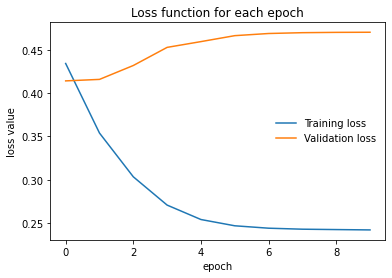

In [ ]:
#Training and validation loss
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title("Loss function for each epoch") 
plt.show()

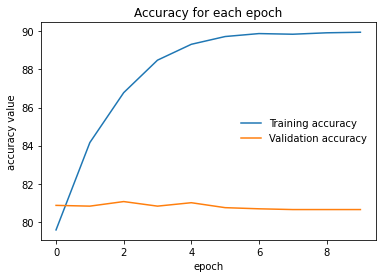

In [ ]:
#Training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(valid_acc, label='Validation accuracy')
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('accuracy value')
plt.title("Accuracy for each epoch")
plt.show()

Increasing batch size make our changes in loss function and accuracy smoother.

In [ ]:
scheduler.state_dict()

{'_get_lr_called_within_step': False,
 '_last_lr': [1.0485760000000006e-06],
 '_step_count': 11,
 'base_lrs': [0.01],
 'gamma': 0.4,
 'last_epoch': 10,
 'step_size': 1,
 'verbose': False}

In [ ]:
model1.state_dict

<bound method Module.state_dict of SentimentAnalysis(
  (embedding): Embedding(6839, 100)
  (lstm): LSTM(100, 32, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)>

In [ ]:
print(f'training loss on last epoch : {train_loss[-1]}')
print(f'validation loss on last epoch : {valid_loss[-1]}')
print('-'*20)
print(f'training accuracy on last epoch : {train_acc[-1]}')
print(f'validation accuracy on last epoch : {valid_acc[-1]}')

training loss on last epoch : 0.24217982954711634
validation loss on last epoch : 0.47017658412456514
--------------------
training accuracy on last epoch : 89.95469988674972
validation accuracy on last epoch : 80.64


### Test the model

In [ ]:
num_class = 2
classes = ['SAD', 'HAPPY']

In [ ]:
def test(model1, test_loader):
  y_pred_test = []
  y_actual_test = []

  model1.eval()
  with torch.no_grad():
    n_true = 0
    n_total = 0
    n_class_correct = [0 for i in range(num_class)]
    n_class_sample = [0 for i in range(num_class)]
  
    for batch in test_loader:

      text, text_length = batch.preprocessing_text

      output = model1(text, text_length).squeeze()

      y_predtest = torch.round(output)

      n_true += (y_predtest == batch.label).sum()
      n_total += batch.label.size(0)

      for i in range(len(y_predtest)):
        y_pred_test.append(y_predtest[i])
        y_actual_test.append(batch.label[i].item())

      for i in range(len(y_predtest)):
        lb = int(batch.label[i].item())
        pred = y_predtest[i]
        if pred == lb:
          n_class_correct[lb] += 1
        n_class_sample[lb] += 1   

    print(f'accuracy of network on the {len(test_loader)} texts is : {(n_true/n_total) *100}')
  
    for i in range(len(classes)):
      acc = 100.0 * n_class_correct[i] / n_class_sample[i]
      print(f'Accuracy of {classes[i]}: {acc} %')
  
  return y_pred_test, y_actual_test

In [ ]:
y_pred_test, y_actual_test = test(model1, test_loader)

accuracy of network on the 55 texts is : 79.99713134765625
Accuracy of SAD: 81.14988558352402 %
Accuracy of HAPPY: 78.84008039046799 %


### Confusion Matrix

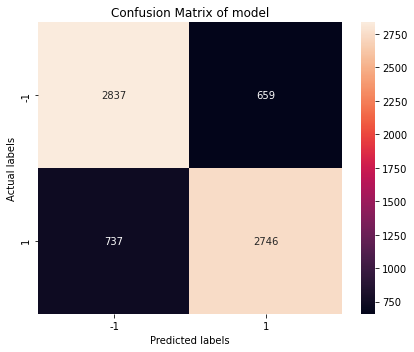

In [ ]:
confusion_matrix(y_actual_test, y_pred_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_actual_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      3496
         1.0       0.81      0.79      0.80      3483

    accuracy                           0.80      6979
   macro avg       0.80      0.80      0.80      6979
weighted avg       0.80      0.80      0.80      6979

